In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


data = pd.read_csv("customer marketing_campaign.csv", sep='\t', engine='python')



# Características numéricas
features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain']

# Variable a comparar
response = 'Response'

#  obtener el tamano del conjunto de datos, visualizar algunos de sus componentes,
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [3]:
data.describe()
#data.drop('ID', axis=1, inplace=True)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
#def check_data(data):
 #   df = data.columns
  #  if df.dtype == object:
   #     for col in df:
    #        sns.distplot(col)

#check_data(data)

AcceptedCmp1: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.

AcceptedCmp2: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.

AcceptedCmp3: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.

AcceptedCmp4: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.

AcceptedCmp5: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.


#### Respuesta (objetivo): 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario.



- Queja: 1 si el cliente se quejó en los últimos 2 años.

DtCustomer: fecha de alta del cliente en la empresa.

- Education: nivel de educación del cliente.

- Marital: estado civil del cliente.

- Kidhome: número de niños pequeños en el hogar del cliente.

- Teenhome: número de adolescentes en el hogar del cliente.

- Income: ingresos anuales del hogar del cliente. Ingresos

- MntFishProducts: cantidad gastada en productos pesqueros en los últimos 2 años

- MntMeatProducts: cantidad gastada en productos cárnicos en los últimos 2 años

- MntFruits: cantidad gastada en productos de fruta en los últimos 2 años

- MntSweetProducts: cantidad gastada en productos dulces en los últimos 2 años

- MntWines: cantidad gastada en productos de vino en los últimos 2 años

- MntGoldProds: cantidad gastada en productos de oro en los últimos 2 años

- NumDealsPurchases: número de compras realizadas con descuento

- NumCatalogPurchases: número de compras realizadas por catálogo

- NumStorePurchases: número de compras realizadas directamente en tiendas físicas

- NumWebPurchases: número de compras realizadas a través del sitio web de la empresa

- NumWebVisitsMonth: número de visitas al sitio web de la empresa en el último mes

- Recentency: número de días desde la última compra

Agradecimientos
O. Parr-Rud. Análisis de negocios con SAS Enterprise Guide y SAS Enterprise Miner. SAS Institute, 2014.

Inspiración
El objetivo principal es entrenar un modelo predictivo que permita a la empresa maximizar las ganancias de la próxima campaña de marketing.

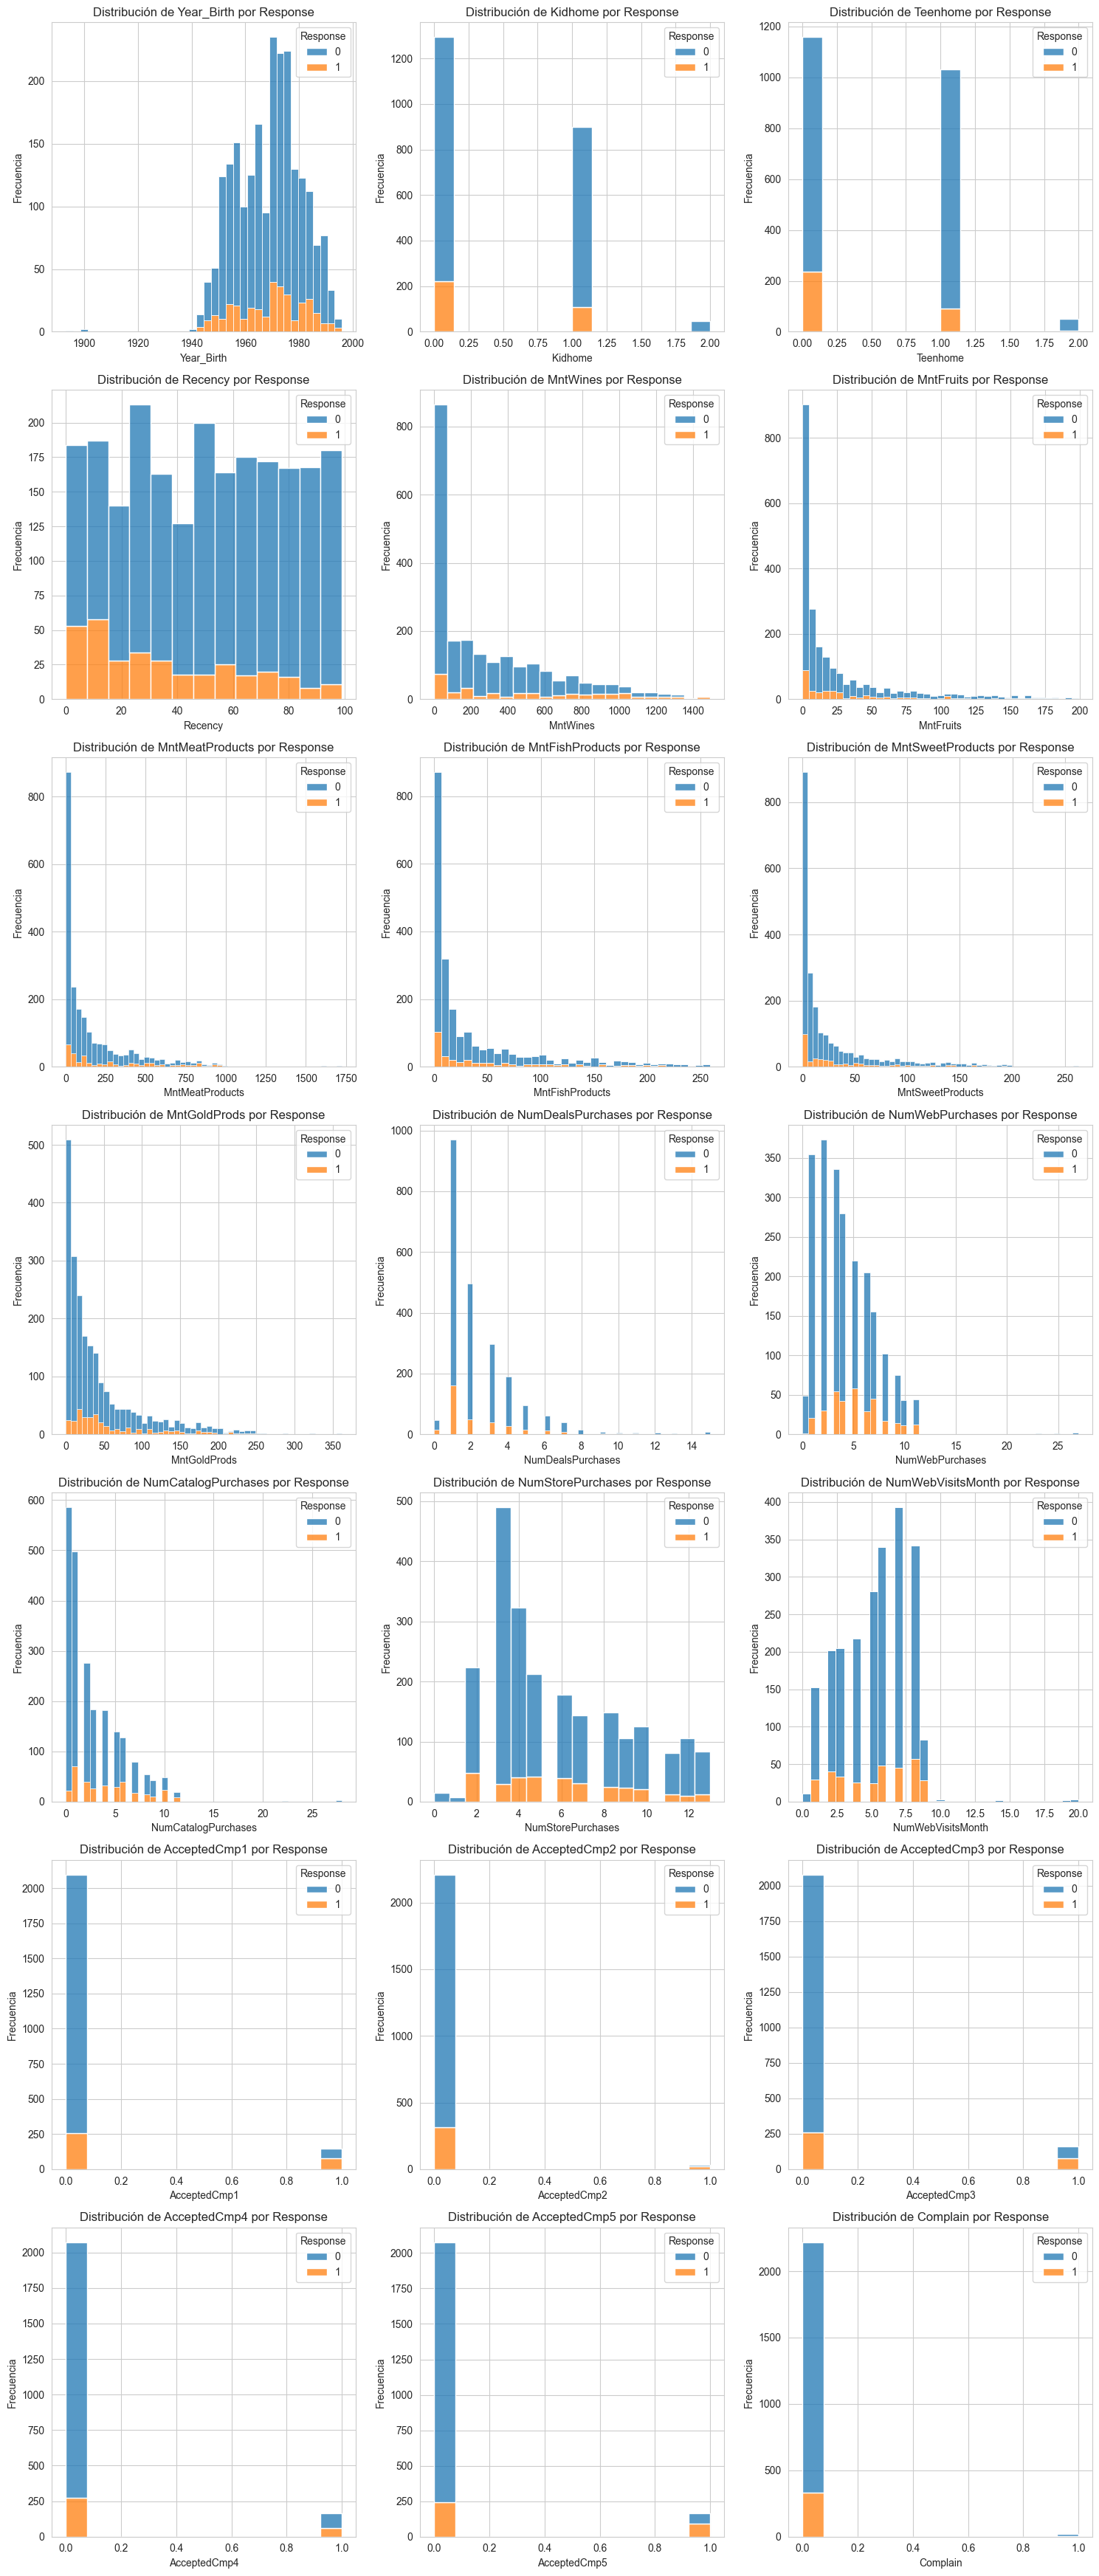

In [5]:
# Configurar la cuadrícula de histogramas
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Graficar distribuciones
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, hue=response, multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribución de {feature} por Response')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

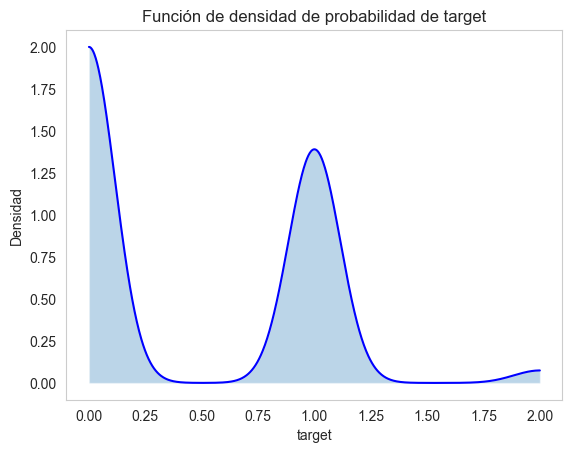

In [6]:

from scipy.stats import gaussian_kde

# Datos (quita NaNs si es necesario)
d = data["Kidhome"].dropna()

# Calcular KDE
kde = gaussian_kde(d)
x = np.linspace(d.min(), d.max(), 1000)
y = kde(x)

# Graficar
plt.plot(x, y, color='blue')
plt.fill_between(x, y, alpha=0.3)
plt.title("Función de densidad de probabilidad de target")
plt.xlabel("target")
plt.ylabel("Densidad")
plt.grid()
plt.show()


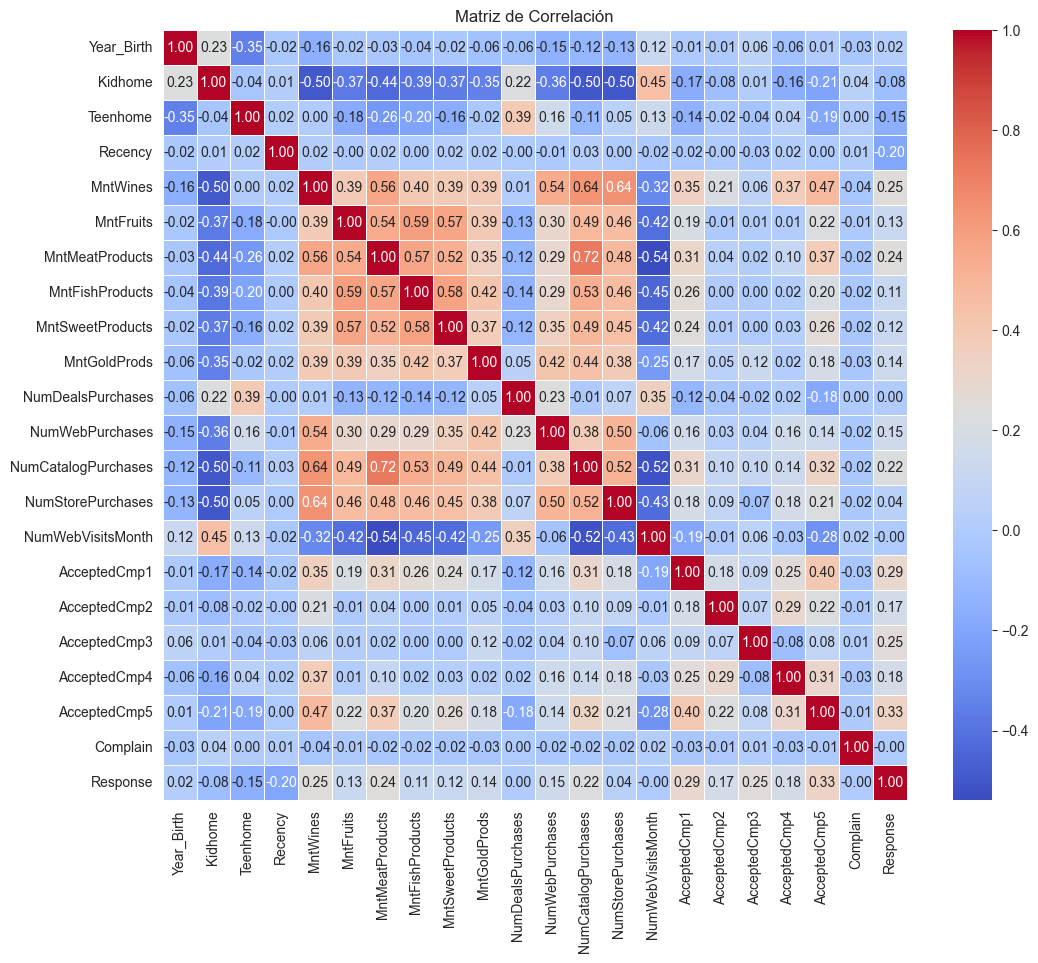

Correlación con Response:
Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Name: Response, dtype: float64


In [7]:
# Calcular la matriz de correlación
correlation_matrix = data[features + [response]].corr()

# Graficar heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Correlación específica con Response
print("Correlación con Response:")
print(correlation_matrix[response].sort_values(ascending=False))